In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing a ton of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
import xgboost as xgb
import scipy.stats

### Importing and exploring the dataset

In [ ]:
df = pd.read_excel('/content/drive/My Drive/Data Mining Project - Baseball Stat CSV.xlsx', 
                   sheet_name=['base 2015','base 2016','base 2017',
                                'base 2018','base 2019','bball 2015',
                                'bball 2016','bball 2017','bball 2018',
                                'bball 2019','Totals'])
bb2015 = df.get('base 2015').drop([30])
bb2016 = df.get('base 2016').drop([30])
bb2017 = df.get('base 2017').drop([30])
bb2018 = df.get('base 2018').drop([30])
bb2019 = df.get('base 2019').drop([30])
bk2015 = df.get('bball 2015').drop([30])
bk2016 = df.get('bball 2016').drop([30])
bk2017 = df.get('bball 2017').drop([30])
bk2018 = df.get('bball 2018').drop([30])
bk2019 = df.get('bball 2019').drop([30])
totals = df.get('Totals')
bb2015.insert(0,"Season",2015,False)
bb2016.insert(0,"Season",2016,False)
bb2017.insert(0,"Season",2017,False)
bb2018.insert(0,"Season",2018,False)
bb2019.insert(0,"Season",2019,False)
bk2015.insert(0,"Season",2015,False)
bk2016.insert(0,"Season",2016,False)
bk2017.insert(0,"Season",2017,False)
bk2018.insert(0,"Season",2018,False)
bk2019.insert(0,"Season",2019,False)

In [ ]:
bb2019.head()

,Season,ID,Team,Total Attendance,Average Attendance,Team Revenue - Millions,Record,Win %,Postseason Outcome,Total Salary,Highest Paid Player,Player Salary,Player Performance
0,2019,BB-ARI-19,Arizona Diamondbacks,2135510,26364.0,278,85-77,0.524691,0.0,123815766,Zack Greinke,32421884,3.96 SIERA
1,2019,BB-ATL-19,Atlanta Braves,2654920,32776.0,476,97-65,0.598765,2.0,128247089,Josh Donaldson,23000000,151 wRC+
2,2019,BB-BAL-19,Baltimore Orioles,1307807,16347.0,256,54-108,0.333333,0.0,80814882,Chris Davis,21118782,91 wRC+
3,2019,BB-BOS-19,Boston Red Sox,2924627,36106.0,519,84-78,0.518519,0.0,236171428,David Price,31000000,3.85 SIERA
4,2019,BB-CHW-19,Chicago White Sox,3094865,38208.0,471,84-78,0.518519,0.0,214246988,Jon Lester,27500000,4.49 SIERA


In [ ]:
big_bb = pd.DataFrame()
big_bk = pd.DataFrame()
bblist = [bb2015, bb2016, bb2017, bb2018, bb2019]
bklist = [bk2015, bk2016, bk2017, bk2018, bk2019]
for i in bblist:
    big_bb = big_bb.append(i,ignore_index = True)
for i in bklist:
    big_bk = big_bk.append(i,ignore_index = True)
big_bb = big_bb.sort_values(by=["Team","Season"])
big_bk = big_bk.sort_values(by=["TEAM","Season"])
big_bk.head(3)

,Season,ID,TEAM,Total Attendance,Average Game Attendance,Team Revenue Millions,Record,Win %,Postseason Outcome,Total Salary,Highest Paid Player,Amount Paid,RAPTOR
0,2015,BK-ATL-15,Atlanta Hawks,712909,17412.0,133,60-22,0.731707,3.0,71661760,Al Horford,12000000,7.4
30,2016,BK-ATL-16,Atlanta Hawks,690150,16832.0,142,48-34,0.585366,2.0,96315163,Paul Milsap,19000000,8.9
60,2017,BK-ATL-17,Atlanta Hawks,654306,15958.0,169,43-39,0.524390,1.0,99992696,Dwight Howard,23180275,4.7


In [ ]:
big_bb.columns = ['season','id','team','total_attendance','average_attendance','team_revenue','record','win%','postseason_outcome',
                 'total_salary','high_paid_player','player_salary','player_performance']
big_bk.columns = ['season','id','team','total_attendance','average_attendance','team_revenue','record','win%','postseason_outcome',
                 'total_salary','high_paid_player','player_salary','player_performance']
big_bk

,season,id,team,total_attendance,average_attendance,team_revenue,record,win%,postseason_outcome,total_salary,high_paid_player,player_salary,player_performance
0,2015,BK-ATL-15,Atlanta Hawks,712909,17412.0,133,60-22,0.731707,3.0,71661760,Al Horford,12000000,7.4
30,2016,BK-ATL-16,Atlanta Hawks,690150,16832.0,142,48-34,0.585366,2.0,96315163,Paul Milsap,19000000,8.9
60,2017,BK-ATL-17,Atlanta Hawks,654306,15958.0,169,43-39,0.524390,1.0,99992696,Dwight Howard,23180275,4.7
90,2018,BK-ATL-18,Atlanta Hawks,590769,14409.0,209,24-58,0.292683,0.0,79180081,Kent Bazemore,16910113,3.1
120,2019,BK-ATL-19,Atlanta Hawks,628440,15327.0,251,29-53,0.353659,0.0,110702618,Carmelo Anthony,25534253,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,2015,BK-WAS-15,Washington Wizards,747796,18238.0,143,46-36,0.560976,2.0,85055155,John Wall,14746000,7.8
59,2016,BK-WAS-16,Washington Wizards,725426,17693.0,146,41-41,0.500000,0.0,104016580,John Wall,15851950,6.7
89,2017,BK-WAS-17,Washington Wizards,697107,17002.0,155,49-33,0.597561,2.0,123306396,Bradley Beal,22116750,12.9
119,2018,BK-WAS-18,Washington Wizards,718946,17973.0,222,43-39,0.524390,1.0,123747588,Otto Porter,24773250,9.4


Lets get that mf player performance column goin

In [ ]:
p_pos = 0
big_bb.assign(player_position = p_pos)
for i in range(len(big_bb)):
    if "SIERA" in big_bb.loc[i,"player_performance"]:
        big_bb.loc[i,"player_position"] = "p"
    elif "wRC+" in big_bb.loc[i,"player_performance"]:
        big_bb.loc[i,"player_position"] = "b"
big_bb.head(2)

,season,id,team,total_attendance,average_attendance,team_revenue,record,win%,postseason_outcome,total_salary,high_paid_player,player_salary,player_performance,player_position
0,2015,BB-ARI-15,Arizona Diamondbacks,2080145,25680.0,223,79-83,0.487654,0.0,88187000,Aaron Hill,12000000,70 wRC+,b
30,2016,BB-ARI-16,Arizona Diamondbacks,2036216,25138.0,253,69-93,0.425926,0.0,98172683,Zack Greinke,34000000,3.27 SIERA,p


In [ ]:
for i in range(len(big_bb)):
    big_bb.loc[i,"player_performance"] = big_bb.loc[i,"player_performance"].translate({ord(letter): None for letter in ' SIERA' + ' wRC+'})
big_bb.head(2)

,season,id,team,total_attendance,average_attendance,team_revenue,record,win%,postseason_outcome,total_salary,high_paid_player,player_salary,player_performance,player_position
0,2015,BB-ARI-15,Arizona Diamondbacks,2080145,25680.0,223,79-83,0.487654,0.0,88187000,Aaron Hill,12000000,70,b
30,2016,BB-ARI-16,Arizona Diamondbacks,2036216,25138.0,253,69-93,0.425926,0.0,98172683,Zack Greinke,34000000,3.27,p


In [ ]:
big_bb = big_bb.astype({'player_performance':'float'})
big_bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              150 non-null    int64  
 1   id                  150 non-null    object 
 2   team                150 non-null    object 
 3   total_attendance    150 non-null    int64  
 4   average_attendance  150 non-null    float64
 5   team_revenue        150 non-null    int64  
 6   record              150 non-null    object 
 7   win%                150 non-null    float64
 8   postseason_outcome  150 non-null    float64
 9   total_salary        150 non-null    int64  
 10  high_paid_player    150 non-null    object 
 11  player_salary       150 non-null    int64  
 12  player_performance  150 non-null    float64
 13  player_position     150 non-null    object 
dtypes: float64(4), int64(5), object(5)
memory usage: 21.6+ KB


In [ ]:
big_bb_p = big_bb.loc[big_bb['player_position'] == 'p']
big_bb_b = big_bb.loc[big_bb['player_position'] == 'b']

In [ ]:
big_df = big_bb
big_df = big_df.append(big_bk)
big_df

,season,id,team,total_attendance,average_attendance,team_revenue,record,win%,postseason_outcome,total_salary,high_paid_player,player_salary,player_performance,player_position
0,2015,BB-ARI-15,Arizona Diamondbacks,2080145,25680.0,223,79-83,0.487654,0.0,88187000,Aaron Hill,12000000,70.00,b
30,2016,BB-ARI-16,Arizona Diamondbacks,2036216,25138.0,253,69-93,0.425926,0.0,98172683,Zack Greinke,34000000,3.27,p
60,2017,BB-ARI-17,Arizona Diamondbacks,2134375,26350.0,258,93-69,0.574074,2.0,93120200,Zach Greinke,31876966,3.48,p
90,2018,BB-ARI-18,Arizona Diamondbacks,2242695,27687.0,275,82-80,0.506173,0.0,131965116,Zack Greinke,31954483,3.60,p
120,2019,BB-ARI-19,Arizona Diamondbacks,2135510,26364.0,278,85-77,0.524691,0.0,123815766,Zack Greinke,32421884,3.96,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,2015,BK-WAS-15,Washington Wizards,747796,18238.0,143,46-36,0.560976,2.0,85055155,John Wall,14746000,7.80,NaN
59,2016,BK-WAS-16,Washington Wizards,725426,17693.0,146,41-41,0.500000,0.0,104016580,John Wall,15851950,6.70,NaN
89,2017,BK-WAS-17,Washington Wizards,697107,17002.0,155,49-33,0.597561,2.0,123306396,Bradley Beal,22116750,12.90,NaN
119,2018,BK-WAS-18,Washington Wizards,718946,17973.0,222,43-39,0.524390,1.0,123747588,Otto Porter,24773250,9.40,NaN


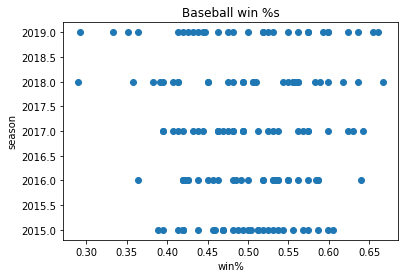

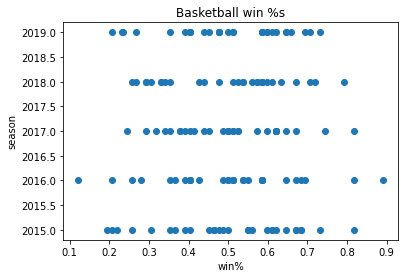

In [ ]:
#used to check possible win% errors in data input
v1 = "win%"
v2 = "season"
df1 = big_bb[[v1, v2]]
df2 = big_bk[[v1, v2]]
plt.figure()
plt.scatter(df1[v1], df1[v2])
plt.xlabel(v1)
plt.ylabel(v2)
plt.title("Baseball win %s")
plt.show()
plt.close()
plt.figure()
plt.scatter(df2[v1], df2[v2])
plt.xlabel(v1)
plt.ylabel(v2)
plt.title("Basketball win %s")
plt.show()
plt.close()

Graph show the win percentages per team in each season, used to original asses the data and make sure that all the listed win percentages made sense 


In [ ]:
def cluster(v1,v2):
    df1 = big_bb[[v1, v2]]
    df2 = big_bk[[v1, v2]]
    print(v1 + " vs " + v2)
    plt.figure()
    plt.scatter(df1[v1], df1[v2])
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.title("baseball " + str(v1) + " vs " + str(v2))
    #plt.annotate("correlation: " + str(round(big_bb['win%'].corr(big_bb['team_revenue']),3)),xy=(.32,600))
    plt.show()
    plt.close()
    print("correlation: " + str(round(big_bb[v1].corr(big_bb[v2]),3)))
    plt.figure()
    plt.scatter(df2[v1], df2[v2])
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.title("basketball " + str(v1) + " vs " + str(v2))
    plt.show()
    plt.close()
    print("correlation: " + str(round(big_bk[v1].corr(big_bk[v2]),3)))

team_revenue vs win%


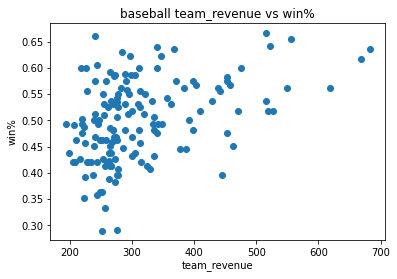

correlation: 0.427


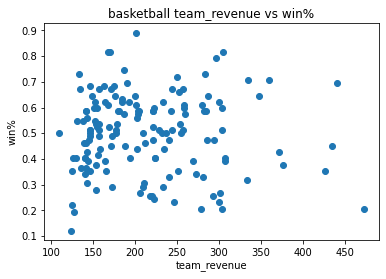

correlation: -0.023
postseason_outcome vs win%


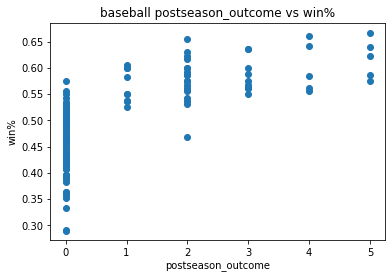

correlation: 0.712


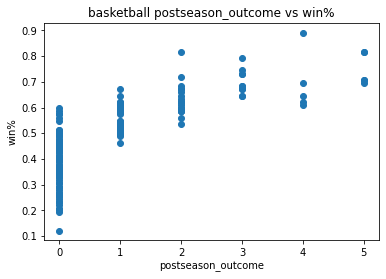

correlation: 0.778
player_salary vs win%


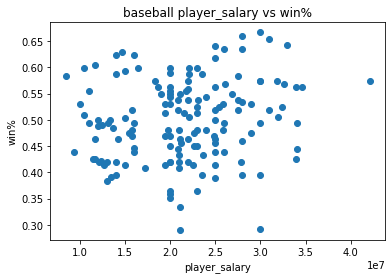

correlation: 0.16


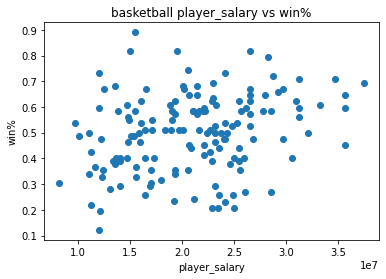

correlation: 0.265


In [ ]:
cluster("team_revenue","win%")
cluster("postseason_outcome","win%")
cluster("player_salary","win%")

Baseball and basketball win% vs team revenue 
Graph for baseball shows a positive correlation between win percentage and the teams revenue whereas for basketball there seems to be no correlation between the two statistics	
Baseball has no salary cap, meaning they can sign all the top players they want, which often leads to successful teams and more revenue for the team. Basketball teams all have a salary cap, meaning there is a limit to how much they pay their players total. This creates a “cap” in team talent, and the league is more balanced. 
Baseball and basketball win % vs postseason outcome 
For both baseball and basketball there seems to be a very strong positive correlation between the in season win percentages and a teams postseason outcome 
Teams that win more in the regular season often have strong postseason success as well, although they are not perfectly correlated. 
Baseball and basketball win% vs player salary
Player salary doesn’t have as positive of a correlation on win percentage as originally thought as shown by the graph


player_performance vs win%


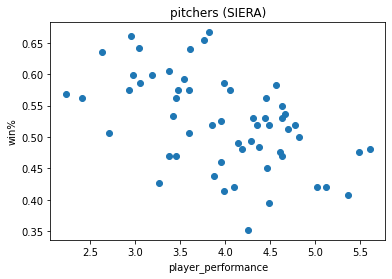

correlation: -0.507


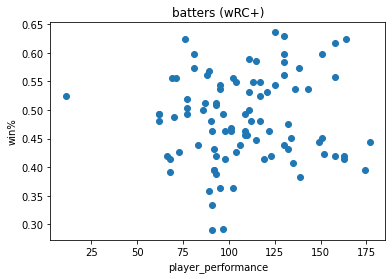

correlation: 0.062


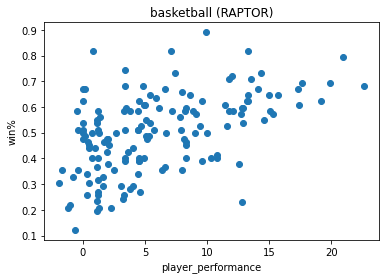

correlation: 0.511


In [ ]:
v1 = "player_performance"
v2 = "win%"
df1p = big_bb_p[[v1, v2]]
df1b = big_bb_b[[v1, v2]]
df2 = big_bk[[v1, v2]]
print(v1 + " vs " + v2)
plt.figure()
plt.scatter(df1p[v1], df1p[v2])
plt.xlabel(v1)
plt.ylabel(v2)
plt.title("pitchers (SIERA)")
#plt.annotate("correlation: " + str(round(big_bb['win%'].corr(big_bb['team_revenue']),3)),xy=(.32,600))
plt.show()
plt.close()
print("correlation: " + str(round(df1p[v1].corr(df1p[v2]),3)))
plt.figure()
plt.scatter(df1b[v1], df1b[v2])
plt.xlabel(v1)
plt.ylabel(v2)
plt.title("batters (wRC+)")
#plt.annotate("correlation: " + str(round(big_bb['win%'].corr(big_bb['team_revenue']),3)),xy=(.32,600))
plt.show()
plt.close()
print("correlation: " + str(round(big_bb_b[v1].corr(big_bb_b[v2]),3)))
plt.figure()
plt.scatter(df2[v1], df2[v2])
plt.xlabel(v1)
plt.ylabel(v2)
plt.title("basketball (RAPTOR)")
plt.show()
plt.close()
print("correlation: " + str(round(big_bk[v1].corr(big_bk[v2]),3)))

Baseball pitchers performances have a very strong negative correlation between, the performance of a pitcher greatly influences how the team will perform
This is because the pitching stat SIERA determines the strength of the pitcher using a modified version of existing pitching stats. Pitching stats are inversely correlated with success, meaning the smaller the number, the better the pitcher performs. This is why this graph has a strong negative correlation, because pitchers help their team win more games by having a lower SIERA score. 
Baseball batters have a very small positive correlation with win percentage suggesting that they do have some weight in winning but not that much 
This is because the batting stat of wRc(weighted runs created) shows the effectiveness of a player to create runs against the average baseball player in the league. Originally we believed that the people earning runs would have a big impact on the win percentage of the team but it seems that while there is correlation it is very little 
Basketball players have a strong positive correlation between their performance and their win percentage, meaning the better the performance of the highest paid player of the team does the better the team itself does 
Player performance for basketball seems to have a stronger correlation on win percentage as there less players on a team playing at one time so the impact of one player on win percentage far surpasses that of a batter in baseball


# Dimensionality reduction / Feature selection and Cluster analysis

In [ ]:
corrbb = big_bb_b.corr()
corrbb.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-199-c98a0bb41448>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrbb.style.background_gradient(cmap='coolwarm').set_precision(2)


,season,total_attendance,average_attendance,team_revenue,win%,postseason_outcome,total_salary,player_salary,player_performance
season,1.00,-0.11,-0.11,0.25,-0.01,-0.04,0.03,0.21,0.21
total_attendance,-0.11,1.00,1.00,0.60,0.44,0.36,0.67,0.48,0.04
average_attendance,-0.11,1.00,1.00,0.61,0.44,0.36,0.68,0.48,0.04
team_revenue,0.25,0.60,0.61,1.00,0.41,0.36,0.64,0.43,0.17
win%,-0.01,0.44,0.44,0.41,1.00,0.67,0.23,-0.10,0.06
postseason_outcome,-0.04,0.36,0.36,0.36,0.67,1.00,0.17,-0.05,0.05
total_salary,0.03,0.67,0.68,0.64,0.23,0.17,1.00,0.60,0.02
player_salary,0.21,0.48,0.48,0.43,-0.10,-0.05,0.60,1.00,0.05
player_performance,0.21,0.04,0.04,0.17,0.06,0.05,0.02,0.05,1.00


In [ ]:
corrbk = big_bk.corr()
corrbk.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-200-1619cc85241c>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrbk.style.background_gradient(cmap='coolwarm').set_precision(2)


,season,total_attendance,average_attendance,team_revenue,win%,postseason_outcome,total_salary,player_salary,player_performance
season,1.00,0.00,0.02,0.67,0.00,-0.01,0.72,0.64,0.16
total_attendance,0.00,1.00,1.00,0.35,0.40,0.41,0.23,0.28,0.18
average_attendance,0.02,1.00,1.00,0.36,0.39,0.40,0.24,0.28,0.17
team_revenue,0.67,0.35,0.36,1.00,-0.02,0.10,0.49,0.64,0.08
win%,0.00,0.40,0.39,-0.02,1.00,0.78,0.34,0.26,0.51
postseason_outcome,-0.01,0.41,0.40,0.10,0.78,1.00,0.29,0.29,0.50
total_salary,0.72,0.23,0.24,0.49,0.34,0.29,1.00,0.64,0.39
player_salary,0.64,0.28,0.28,0.64,0.26,0.29,0.64,1.00,0.37
player_performance,0.16,0.18,0.17,0.08,0.51,0.50,0.39,0.37,1.00


## Feature reduction and cluster analysis for Baseball

In [ ]:
featuresp = big_bb_p[big_bb.columns[3:]]
featuresp = featuresp.drop(columns=["record","high_paid_player","player_position","win%"])
featuresb = big_bb_b[big_bb.columns[3:]]
featuresb = featuresb.drop(columns=["record","high_paid_player","player_position","win%"])
id = big_bb_p[big_bb_p.columns[1:2]]
idb = big_bb_b[big_bb_b.columns[1:2]]
targets = big_bb_p[big_bb_p.columns[7:8]]
targetsb = big_bb_b[big_bb_b.columns[7:8]]
cnames = featuresp.columns
featuresp.head()

,total_attendance,average_attendance,team_revenue,postseason_outcome,total_salary,player_salary,player_performance
30,2036216,25138.0,253,0.0,98172683,34000000,3.27
60,2134375,26350.0,258,2.0,93120200,31876966,3.48
90,2242695,27687.0,275,0.0,131965116,31954483,3.60
120,2135510,26364.0,278,0.0,123815766,32421884,3.96
33,2955434,36486.0,398,2.0,197899679,30000000,3.60


In [ ]:
#normalize each feature between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
np_scaledp = min_max_scaler.fit_transform(featuresp)
np_scaledb = min_max_scaler.fit_transform(featuresb)
sfeatures = pd.DataFrame(np_scaledp, columns = cnames)
sfeaturesb = pd.DataFrame(np_scaledb, columns = cnames)
sfeatures = sfeatures.append(sfeaturesb)
sfeatures = sfeatures.drop(["total_attendance"], axis = 1)
id = id.append(idb)
targets = targets.append(targetsb)
sfeatures

,average_attendance,team_revenue,postseason_outcome,total_salary,player_salary,player_performance
0,0.387257,0.128571,0.0,0.171500,0.751309,0.307692
1,0.418295,0.140476,0.4,0.148750,0.686469,0.369822
2,0.452534,0.180952,0.0,0.323655,0.688837,0.405325
3,0.418653,0.188095,0.0,0.286962,0.703112,0.511834
4,0.677866,0.473810,0.4,0.620536,0.629145,0.405325
...,...,...,...,...,...,...
88,0.966106,0.173469,0.6,0.447353,0.450585,0.560241
89,0.895589,0.165306,0.0,0.608767,0.450585,0.542169
90,0.577626,0.146939,0.0,0.600607,0.567620,0.843373
91,0.351463,0.146939,0.0,0.330626,0.428934,0.650602


In [ ]:
numberOfFeatures = 2
pcnames = []
for n in range(0, numberOfFeatures):
    pcnames.append("PC" + str(n))
pca = PCA(n_components=numberOfFeatures)
pca = pca.fit(sfeatures)
X_pca = pca.transform(sfeatures)
pcaDF = pd.DataFrame(X_pca, columns = pcnames)
pcaDF.head()
#runs PCA on a given number of features

,PC0,PC1
0,-0.167465,-0.066722
1,-0.007831,0.258558
2,-0.075059,-0.135055
3,-0.113597,-0.159189
4,0.464155,0.046785


[0.49636585 0.2060274 ]


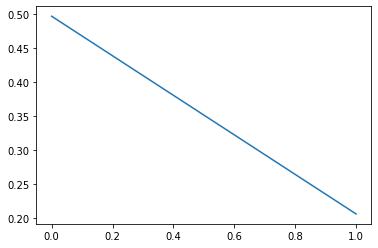

In [ ]:
var = pca.explained_variance_ratio_
print(var)
plt.plot(var)
#plotting variance ratios for each feature

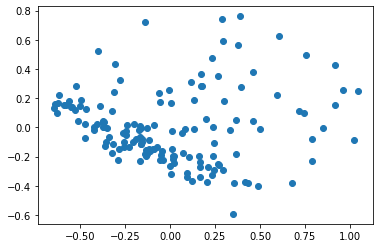

In [ ]:
plt.scatter(pcaDF['PC0'], pcaDF['PC1'])
plt.show()
plt.close()
#graphing the scatter plot

Dimensionality reduction/Feature selection for baseball
The elbow rule for the PCA showed us that for the number of features that we should utilize was 2, any further features do not have as much of an effect on the model
Cluster analysis for baseball 
We used Kmeans clustering to show the three clusters that were created by the PCA


In [ ]:
pcaDFk = pcaDF
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(pcaDFk)
cs = kmeans.labels_
pcaDFk["cluster"] = cs
pcaDFk.head()
#runs a KMeans cluster with 3 clusters, assigns them to a new cluster column

,PC0,PC1,cluster
0,-0.167465,-0.066722,0
1,-0.007831,0.258558,0
2,-0.075059,-0.135055,2
3,-0.113597,-0.159189,2
4,0.464155,0.046785,1


In [ ]:
c0 = pcaDFk[pcaDFk["cluster"] == 0]
print(c0.shape)
c1 = pcaDFk[pcaDFk["cluster"] == 1]
print(c1.shape)
c2 = pcaDFk[pcaDFk["cluster"] == 2]
print(c2.shape)
#adds data points to a dataframe based on what cluster they were assigned to

(65, 3)
(29, 3)
(56, 3)


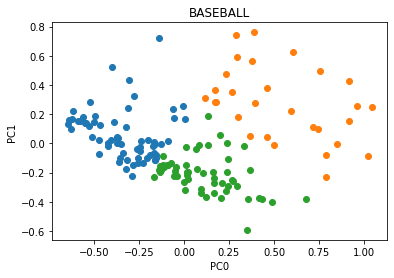

In [ ]:
plt.figure()
plt.scatter(c0["PC0"], c0["PC1"])
plt.scatter(c1["PC0"], c1["PC1"])
plt.scatter(c2["PC0"], c2["PC1"])
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("BASEBALL")
plt.show()
plt.close()
#plots data with clusters

## Feature reduction and cluster analysis for Basketball

In [ ]:
big_bk.columns

Index(['season', 'id', 'team', 'total_attendance', 'average_attendance',
       'team_revenue', 'record', 'win%', 'postseason_outcome', 'total_salary',
       'high_paid_player', 'player_salary', 'player_performance'],
      dtype='object')

In [ ]:
features = big_bk[big_bk.columns[3:]]
features = features.drop(columns=["record","high_paid_player","win%"])
id = big_bk[big_bk.columns[1:2]]
targets = big_bk[big_bk.columns[7:8]]
cnames = featuresp.columns
features.head()

,total_attendance,average_attendance,team_revenue,postseason_outcome,total_salary,player_salary,player_performance
0,712909,17412.0,133,3.0,71661760,12000000,7.4
30,690150,16832.0,142,2.0,96315163,19000000,8.9
60,654306,15958.0,169,1.0,99992696,23180275,4.7
90,590769,14409.0,209,0.0,79180081,16910113,3.1
120,628440,15327.0,251,0.0,110702618,25534253,-0.4


In [ ]:
#normalize each feature between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(features)
sfeatures = pd.DataFrame(np_scaled, columns = cnames)
sfeatures = sfeatures.drop(["total_attendance"], axis = 1)
sfeatures.head()

,average_attendance,team_revenue,postseason_outcome,total_salary,player_salary,player_performance
0,0.440609,0.063536,0.6,0.109044,0.130612,0.379592
1,0.367005,0.088398,0.4,0.378522,0.369669,0.440816
2,0.256091,0.162983,0.2,0.418720,0.512430,0.269388
3,0.059518,0.273481,0.0,0.191224,0.298297,0.204082
4,0.176015,0.389503,0.0,0.535787,0.592820,0.061224


In [ ]:
numberOfFeatures = 2
pcnames = []
for n in range(0, numberOfFeatures):
    pcnames.append("PC" + str(n))
pca = PCA(n_components=numberOfFeatures)
pca = pca.fit(sfeatures)
X_pca = pca.transform(sfeatures)
pcaDF = pd.DataFrame(X_pca, columns = pcnames)
pcaDF.head()
#runs PCA on a given number of features

,PC0,PC1
0,-0.156470,-0.614537
1,-0.032619,-0.312091
2,-0.137207,-0.021386
3,-0.490539,0.034344
4,-0.192885,0.356082


[0.46268187 0.2106787 ]


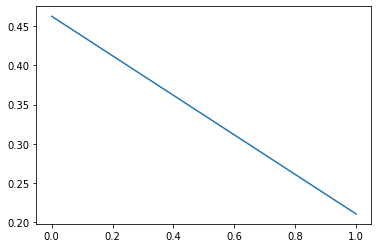

In [ ]:
var = pca.explained_variance_ratio_
print(var)
plt.plot(var)
#plotting variance ratios for each feature

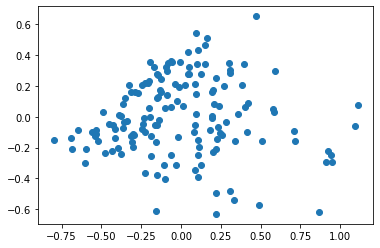

In [ ]:
plt.scatter(pcaDF['PC0'], pcaDF['PC1'])
plt.show()
plt.close()
#graphing the scatter plot

Dimensionality reduction/Feature selection for basketball
The elbow rule once again showed that any number of features greater than two had no real further effect on the model
Cluster analysis for basketball
We used Kmeans clustering to show the three clusters that were created by the PCA


In [ ]:
pcaDFk = pcaDF
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(pcaDFk)
cs = kmeans.labels_
pcaDFk["cluster"] = cs
pcaDFk.head()
#runs a KMeans cluster with 3 clusters, assigns them to a new cluster column

,PC0,PC1,cluster
0,-0.156470,-0.614537,0
1,-0.032619,-0.312091,0
2,-0.137207,-0.021386,0
3,-0.490539,0.034344,0
4,-0.192885,0.356082,1


In [ ]:
c0 = pcaDFk[pcaDFk["cluster"] == 0]
print(c0.shape)
c1 = pcaDFk[pcaDFk["cluster"] == 1]
print(c1.shape)
c2 = pcaDFk[pcaDFk["cluster"] == 2]
print(c2.shape)
#adds data points to a dataframe based on what cluster they were assigned to

(56, 3)
(57, 3)
(37, 3)


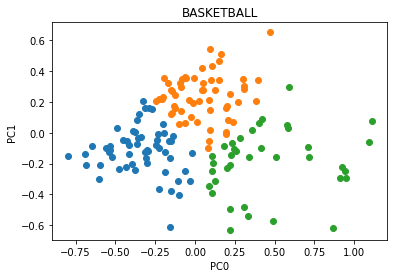

In [ ]:
plt.figure()
plt.scatter(c0["PC0"], c0["PC1"])
plt.scatter(c1["PC0"], c1["PC1"])
plt.scatter(c2["PC0"], c2["PC1"])
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("BASKETBALL")
plt.show()
plt.close()
#plots data with clusters

## Feature reduction and cluster analysis for Both

In [ ]:
#baseball
featuresp = big_bb_p[big_bb.columns[3:]]
featuresp = featuresp.drop(columns=["record","high_paid_player","player_position","win%"])
featuresb = big_bb_b[big_bb.columns[3:]]
featuresb = featuresb.drop(columns=["record","high_paid_player","player_position","win%"])
bbid = big_bb_p[big_bb_p.columns[1:2]]
idb = big_bb_b[big_bb_b.columns[1:2]]
bbtargets = big_bb_p[big_bb_p.columns[7:8]]
targetsb = big_bb_b[big_bb_b.columns[7:8]]
cnames = featuresp.columns
#normalize each feature between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
np_scaledp = min_max_scaler.fit_transform(featuresp)
np_scaledb = min_max_scaler.fit_transform(featuresb)
bbfeatures = pd.DataFrame(np_scaledp, columns = cnames)
bbfeaturesb = pd.DataFrame(np_scaledb, columns = cnames)
bbfeatures = bbfeatures.append(sfeaturesb)
bbfeatures = bbfeatures.drop(["total_attendance"], axis = 1)
bbid = bbid.append(idb)
bbtargets = bbtargets.append(targetsb)
bbfeatures

,average_attendance,team_revenue,postseason_outcome,total_salary,player_salary,player_performance
0,0.387257,0.128571,0.0,0.171500,0.751309,0.307692
1,0.418295,0.140476,0.4,0.148750,0.686469,0.369822
2,0.452534,0.180952,0.0,0.323655,0.688837,0.405325
3,0.418653,0.188095,0.0,0.286962,0.703112,0.511834
4,0.677866,0.473810,0.4,0.620536,0.629145,0.405325
...,...,...,...,...,...,...
88,0.966106,0.173469,0.6,0.447353,0.450585,0.560241
89,0.895589,0.165306,0.0,0.608767,0.450585,0.542169
90,0.577626,0.146939,0.0,0.600607,0.567620,0.843373
91,0.351463,0.146939,0.0,0.330626,0.428934,0.650602


In [ ]:
#basketball
bkfeatures = big_bk[big_bk.columns[3:]]
bkfeatures = bkfeatures.drop(columns=["record","high_paid_player","win%"])
bkid = big_bk[big_bk.columns[1:2]]
bktargets = big_bk[big_bk.columns[7:8]]
cnames = featuresp.columns
#normalize each feature between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(bkfeatures)
bkfeatures = pd.DataFrame(np_scaled, columns = cnames)
bkfeatures = bkfeatures.drop(["total_attendance"], axis = 1)
bkfeatures.head()

,average_attendance,team_revenue,postseason_outcome,total_salary,player_salary,player_performance
0,0.440609,0.063536,0.6,0.109044,0.130612,0.379592
1,0.367005,0.088398,0.4,0.378522,0.369669,0.440816
2,0.256091,0.162983,0.2,0.418720,0.512430,0.269388
3,0.059518,0.273481,0.0,0.191224,0.298297,0.204082
4,0.176015,0.389503,0.0,0.535787,0.592820,0.061224


with our powers combined

In [ ]:
bothfeatures = bbfeatures
bothfeatures = bothfeatures.append(bkfeatures)
id = bbid
id = id.append(bkid)
targets = bbtargets
targets = targets.append(bktargets)
bothfeatures = bothfeatures.reset_index(drop=True)
id = id.reset_index(drop=True)
targets = targets.reset_index(drop=True)
bothfeatures

,average_attendance,team_revenue,postseason_outcome,total_salary,player_salary,player_performance
0,0.387257,0.128571,0.0,0.171500,0.751309,0.307692
1,0.418295,0.140476,0.4,0.148750,0.686469,0.369822
2,0.452534,0.180952,0.0,0.323655,0.688837,0.405325
3,0.418653,0.188095,0.0,0.286962,0.703112,0.511834
4,0.677866,0.473810,0.4,0.620536,0.629145,0.405325
...,...,...,...,...,...,...
295,0.545431,0.091160,0.4,0.255443,0.224390,0.395918
296,0.476269,0.099448,0.0,0.462704,0.262160,0.351020
297,0.388579,0.124309,0.4,0.673554,0.476109,0.604082
298,0.511802,0.309392,0.2,0.678377,0.566831,0.461224


In [ ]:
numberOfFeatures = 2
pcnames = []
for n in range(0, numberOfFeatures):
    pcnames.append("PC" + str(n))
pca = PCA(n_components=numberOfFeatures)
pca = pca.fit(bothfeatures)
X_pca = pca.transform(bothfeatures)
pcaDF = pd.DataFrame(X_pca, columns = pcnames)
pcaDF
#runs PCA on a given number of features

,PC0,PC1
0,-0.213432,-0.143441
1,-0.038390,0.103066
2,-0.106771,-0.107699
3,-0.120371,-0.018073
4,0.420718,-0.059441
...,...,...
295,-0.140229,0.190418
296,-0.245724,-0.095800
297,0.125910,0.180263
298,0.190785,-0.079094


[0.42736964 0.1894453 ]


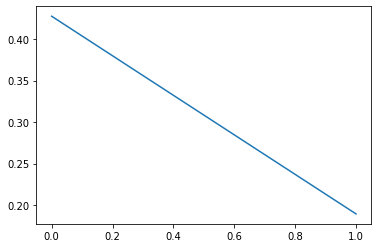

In [ ]:
var = pca.explained_variance_ratio_
print(var)
plt.plot(var)
#plotting variance ratios for each feature

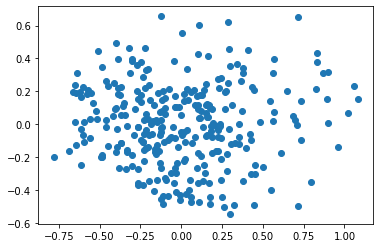

In [ ]:
plt.scatter(pcaDF['PC0'], pcaDF['PC1'])
plt.show()
plt.close()
#graphing the scatter plot

Dimensionality reduction/Feature selection for baseball and basketball
After normalizing both datasets, we were able to add the two sets together, because all numbers are based on the league it is from. 
Cluster analysis for both
We used Kmeans clustering to show the three clusters that were created by the PCA


In [ ]:
pcaDFk = pcaDF
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(pcaDFk)
cs = kmeans.labels_
pcaDFk["cluster"] = cs
pcaDFk.head()
#runs a KMeans cluster with 3 clusters, assigns them to a new cluster column

,PC0,PC1,cluster
0,-0.213432,-0.143441,1
1,-0.038390,0.103066,0
2,-0.106771,-0.107699,0
3,-0.120371,-0.018073,1
4,0.420718,-0.059441,2


In [ ]:
c0 = pcaDFk[pcaDFk["cluster"] == 0]
print(c0.shape)
c1 = pcaDFk[pcaDFk["cluster"] == 1]
print(c1.shape)
c2 = pcaDFk[pcaDFk["cluster"] == 2]
print(c2.shape)
#adds data points to a dataframe based on what cluster they were assigned to

(128, 3)
(120, 3)
(52, 3)


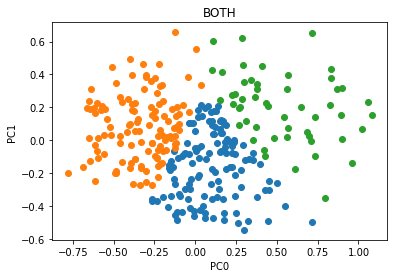

In [ ]:
plt.figure()
plt.scatter(c0["PC0"], c0["PC1"])
plt.scatter(c1["PC0"], c1["PC1"])
plt.scatter(c2["PC0"], c2["PC1"])
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("BOTH")
plt.show()
plt.close()
#plots data with clusters

#Outlier detection

## Using DBScan

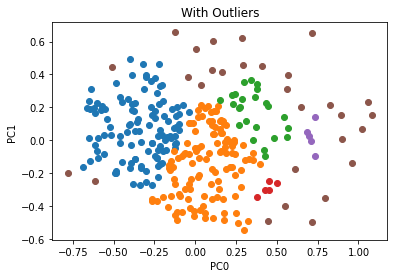

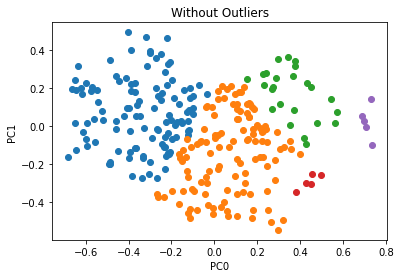

In [ ]:
PCADB = pcaDF
clustering = DBSCAN(eps=.1, min_samples=3).fit(PCADB)
cs = clustering.labels_
PCADB["cluster"] = cs
c0 = PCADB[PCADB["cluster"] == 0]
c1 = PCADB[PCADB["cluster"] == 1]
c2 = PCADB[PCADB["cluster"] == 2]
c3 = PCADB[PCADB["cluster"] == 3]
c4 = PCADB[PCADB["cluster"] == 4]
c00 = PCADB[PCADB["cluster"] == -1]
plt.figure()
#first chart ommits outliers
plt.scatter(c0["PC0"], c0["PC1"])
plt.scatter(c1["PC0"], c1["PC1"])
plt.scatter(c2["PC0"], c2["PC1"])
plt.scatter(c3["PC0"], c3["PC1"])
plt.scatter(c4["PC0"], c4["PC1"])
plt.scatter(c00["PC0"], c00["PC1"])
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("With Outliers")
plt.show()
plt.close()
plt.scatter(c0["PC0"], c0["PC1"])
plt.scatter(c1["PC0"], c1["PC1"])
plt.scatter(c2["PC0"], c2["PC1"])
plt.scatter(c3["PC0"], c3["PC1"])
plt.scatter(c4["PC0"], c4["PC1"])
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("Without Outliers")
plt.show()
plt.close()

Outlier detection using DBSCAN
Removed all of the outliers that we classified as data points that weren’t within .1 of other data points 


## Using distances

In [ ]:
pcaDFk = pcaDF
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(pcaDFk)
cs = kmeans.labels_
pcaDFk["cluster"] = cs
c0 = pcaDFk[pcaDFk["cluster"] == 0]
print(c0.shape)
c1 = pcaDFk[pcaDFk["cluster"] == 1]
print(c1.shape)
c2 = pcaDFk[pcaDFk["cluster"] == 2]
print(c2.shape)
c3 = pcaDFk[pcaDFk["cluster"] == 3]
print(c3.shape)
centroids = kmeans.cluster_centers_
print(centroids)

pcaDFk

(144, 3)
(125, 3)
(31, 3)
(0, 3)
[[ 1.20845567e-01 -9.07509777e-02 -8.88178420e-16]
 [-3.15038611e-01  9.73298653e-02  1.00000000e+00]
 [ 7.08969832e-01  2.90937945e-02  2.00000000e+00]]


,PC0,PC1,cluster
0,-0.213432,-0.143441,1
1,-0.038390,0.103066,0
2,-0.106771,-0.107699,0
3,-0.120371,-0.018073,1
4,0.420718,-0.059441,0
...,...,...,...
295,-0.140229,0.190418,1
296,-0.245724,-0.095800,1
297,0.125910,0.180263,0
298,0.190785,-0.079094,0


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

distance = []
count1 = 0
count2 = 0
count3 = 0
for i in range(0, pcaDFk.shape[0]):
    point = [pcaDFk["PC0"][i], pcaDFk["PC1"][i]]
    if pcaDFk["cluster"][i] == 0:
        distance.append(round(euclidean_distances([point],[centroids[0]])[0][0],2))
        count1 = count1 + 1
    elif pcaDFk["cluster"][i] == 1:
        distance.append(round(euclidean_distances([point],[centroids[1]])[0][0],2))
        count2 = count2 + 1
    elif pcaDFk["cluster"][i] == 2:
        distance.append(round(euclidean_distances([point],[centroids[2]])[0][0],2))
        count3 = count3 + 1

print(count1)
print(count2)
print(count3)
pcaDFk["distance"] = distance
pcaDFk

ValueError: ignored

In [ ]:
#gives the mean and max distance for each cluster
dfk0 = pcaDFk[pcaDFk["cluster"] == 0]
dfk1 = pcaDFk[pcaDFk["cluster"] == 1]
dfk2 = pcaDFk[pcaDFk["cluster"] == 2]

print(np.mean(dfk0.distance))
print(np.max(dfk0.distance))
print(np.mean(dfk1.distance))
print(np.max(dfk1.distance))
print(np.mean(dfk2.distance))
print(np.max(dfk2.distance))

0.248046875
0.7
0.24299999999999997
0.61
0.3080769230769231
0.61


Outlier detection using KMeans 
Removed the outliers from the KMeans clusters and plotted the new clusters with their centroids without the outliers 


In [ ]:
pcaDFk["id"] = id
mdf = big_df.merge(pcaDFk, on = ["id"])
mdf.sort_values(by = ["distance"], ascending = False)[:10]

ValueError: ignored

# Machine learning

In [ ]:
#reading about python def https://www.w3schools.com/python/ref_keyword_def.asp

def get_ba(x,y,z,q):
    #fit model and make predictions
    clf.fit(x, list(y))
    y_pred = clf.predict(z)

    #evaluate model - testing
    conf_mat = confusion_matrix(list(q), y_pred)
    TN = conf_mat[0][0]
    TP = conf_mat[1][1]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    sens = TP/(TP+FN)
    spec = TN/(TN+FP)
    ba = (sens + spec)/2
    return ba

For our machine learning models, we used the list of models from the last notebook, which include Naive Bayes, Logistic Regression, multiple versions of SVCs, k-Nearest Neighbors, and Random Forests. Our target to predict is postseason outcome, so whether a team makes the playoffs and how far the team goes. This is a simple measure of the success of a team in any league. 

In [ ]:
numberOfFeatures = 2 #set number of principal components
modelTypelist = ["NB", "LR", "SVC1", "SVC2", "SVC3", "SVC4", "kNN", "RF"]

train_ba_depression = []
test_ba_depression = []
rlist = []
mlist = []

big_df_dropped = big_df.drop(columns=["season","team","record","high_paid_player","player_position"])


for modelType in modelTypelist: 
    for r in range(50, 75):
        rlist.append(r)
        mlist.append(modelType)

        #create train/test sets
        df_train, df_test = train_test_split(big_df_dropped, test_size=0.3, random_state = r)

        #save target variables
        train_targets = df_train.loc[:,["postseason_outcome"]]
        test_targets = df_test.loc[:,["postseason_outcome"]]

        #drop non-features: id and targets
        trainContent = df_train.drop(columns = ["id", "postseason_outcome"])
        testContent = df_test.drop(columns = ["id", "postseason_outcome"])

        #normalize before pca
        min_max_scaler = preprocessing.MinMaxScaler()  
        np_scaled = min_max_scaler.fit_transform(trainContent)
        featureSubset = pd.DataFrame(np_scaled)
        np_scaled2 =  min_max_scaler.transform(testContent)
        testSubset = pd.DataFrame(np_scaled2)

        #principal component analysis
        pca = PCA(n_components=numberOfFeatures)
        pca = pca.fit(featureSubset)
        X_pca = pca.transform(featureSubset)
        pcaDF = pd.DataFrame(X_pca)
        testSubset2 = pca.transform(testSubset)
        pca_test = pd.DataFrame(testSubset2)

        #upsampling to balance classes
        train_targets = train_targets.reset_index(drop = True)
        pcaDF_labels = pd.concat([pcaDF,train_targets], axis = 1) #reattach labels

        phq0 = pcaDF_labels.loc[pcaDF_labels["postseason_outcome"] > 0.1]
        phq1 = pcaDF_labels.loc[pcaDF_labels["postseason_outcome"] <= 0.1]
        if phq0.shape[0]>phq1.shape[0]:
            phq_upsampled = resample(phq1, n_samples=(phq0.shape[0]-phq1.shape[0]), random_state=50)
            phq_up = pd.concat([pcaDF_labels, phq_upsampled])
        elif phq0.shape[0]<phq1.shape[0]:
            phq_upsampled = resample(phq0, n_samples=(phq1.shape[0]-phq0.shape[0]), random_state=50)
            phq_up = pd.concat([pcaDF_labels, phq_upsampled])

        #remove upsampled labels
        pca_phq_targets = phq_up.loc[:,["postseason_outcome"]]
        pca_phq_features = phq_up.drop(columns = ["postseason_outcome"])

        #select modeltype
        if modelType == "SVC1":
            clf = svm.SVC(kernel='rbf', random_state=r)
        elif modelType == "SVC2":
            clf = svm.SVC(kernel='linear', random_state=r)
        elif modelType == "SVC3":
            clf = svm.SVC(kernel='sigmoid', random_state=r)
        elif modelType == "SVC4":
            clf = svm.SVC(kernel='poly', random_state=r)
        elif modelType == "RF":
            clf = RandomForestClassifier(criterion="gini", max_depth=3, random_state=r)
        elif modelType == "kNN":
            clf = KNeighborsClassifier()
        elif modelType == "LR":
            clf = LogisticRegression(random_state=r)
        elif modelType == "NB":
            clf = GaussianNB()
        
        #print(pca_phq_features.shape)
        #print(pca_phq_targets.shape)
        #print(pca_test)
        #print(test_targets)

        #train evaluate models
        ba = get_ba(pca_phq_features, pca_phq_targets["postseason_outcome"], pca_test, test_targets["postseason_outcome"])
        test_ba_depression.append(ba)
        
                
resultsDF = pd.DataFrame()
resultsDF["test_ba"] = test_ba_depression
resultsDF["random"] = rlist
resultsDF["model"] = mlist
resultsDF.head()

,test_ba,random,model
0,0.482759,50,NB
1,0.500000,51,NB
2,0.500000,52,NB
3,0.500000,53,NB
4,0.500000,54,NB


In [ ]:
#creates a list containing all the models' balanced accuracy
bas = []
for modelType in modelTypelist: 
    tempDF = resultsDF[resultsDF.model == modelType]
    bas.append(tempDF['test_ba'].to_numpy())

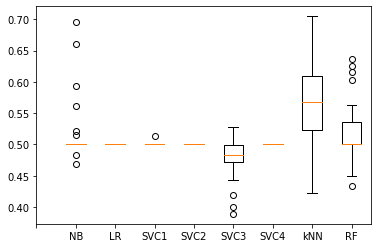

In [ ]:
#creates box plots for each model type, plotting balanced accuracy
plt.boxplot(bas)
plt.xticks(range(0, len(bas)+1), [' ']+ modelTypelist)
plt.show()

In [ ]:
for modelType in modelTypelist: 
    tempDF = resultsDF[resultsDF.model == modelType]
    print(modelType + ": " + str(round(np.mean(tempDF["test_ba"]),2)) + " +- " + str(round(np.std(tempDF["test_ba"]),2)))

NB: 0.52 +- 0.05
LR: 0.5 +- 0.0
SVC1: 0.5 +- 0.0
SVC2: 0.5 +- 0.0
SVC3: 0.48 +- 0.03
SVC4: 0.5 +- 0.0
kNN: 0.56 +- 0.07
RF: 0.52 +- 0.05


It seems that only a few of these models were effective in their predictions. KNN, RF, NB and SVC3 were the only models that had a standard deviation over 0, so we believe these models actually make predictions on the dataset. 

# Bagging and boosting


For our bagging and boosting models, we used tree boosting models AdaBoost and XGBoost to create multiple weighted training sets, and used them to predict postseason outcome from our dataset. We also used random forests as our tree bagging method to create random training sets to increase prediction ability, make the model more robust, and create a better classifier overall. 

In [ ]:
#creates multiple models using the dataset and tests accuracy of both training and test sets created
#numberOfFeatures = 2 #set number of principal components
modelTypelist = ["Ada", "XGB", "RFg", "RFe", "dte", "dtg"]

train_ba_depression = []
test_ba_depression = []
rlist = []
mlist = []

big_df_dropped = big_df.drop(columns=["season","team","record","high_paid_player","player_position"])


for modelType in modelTypelist: 
    for r in range(50, 75):
        rlist.append(r)
        mlist.append(modelType)

        #create train/test sets
        df_train, df_test = train_test_split(big_df_dropped, test_size=0.3, random_state = r)

        #save target variables
        train_targets = df_train.loc[:,["postseason_outcome"]]
        test_targets = df_test.loc[:,["postseason_outcome"]]

        #drop non-features: id and targets
        trainContent = df_train.drop(columns = ["id", "postseason_outcome"])
        testContent = df_test.drop(columns = ["id", "postseason_outcome"])

        #normalize before pca
        min_max_scaler = preprocessing.MinMaxScaler()  
        np_scaled = min_max_scaler.fit_transform(trainContent)
        featureSubset = pd.DataFrame(np_scaled)
        np_scaled2 =  min_max_scaler.transform(testContent)
        testSubset = pd.DataFrame(np_scaled2)

        #principal component analysis
        #pca = PCA(n_components=numberOfFeatures)
        #pca = pca.fit(featureSubset)
        #X_pca = pca.transform(featureSubset)
        #pcaDF = pd.DataFrame(X_pca)
        #testSubset2 = pca.transform(testSubset)
        #pca_test = pd.DataFrame(testSubset2)
        
        #upsampling to balance classes
        train_targets = train_targets.reset_index(drop = True)
        DF_labels = pd.concat([featureSubset,train_targets], axis = 1) #reattach labels

        phq0 = DF_labels.loc[DF_labels['postseason_outcome'] > 0.1]
        phq1 = DF_labels.loc[DF_labels['postseason_outcome'] <= 0.1]
        if phq0.shape[0]>phq1.shape[0]:
            phq_upsampled = resample(phq1, n_samples=(phq0.shape[0]-phq1.shape[0]), random_state=50)
            phq_up = pd.concat([DF_labels, phq_upsampled])
        elif phq0.shape[0]<phq1.shape[0]:
            phq_upsampled = resample(phq0, n_samples=(phq1.shape[0]-phq0.shape[0]), random_state=50)
            phq_up = pd.concat([DF_labels, phq_upsampled])

        #remove upsampled labels
        phq_targets = phq_up.loc[:,["postseason_outcome"]]
        phq_features = phq_up.drop(columns = ["postseason_outcome"])

        #select modeltype
        if modelType == "Ada":
            clf = AdaBoostClassifier(random_state=r)
        elif modelType == "XGB":
            clf = xgb.XGBClassifier(max_depth=3, random_state=r)
        elif modelType == "RFg":
            clf = RandomForestClassifier(criterion="gini", max_depth=3, random_state=r)
        elif modelType == "RFe":
            clf = RandomForestClassifier(criterion="entropy", max_depth=3, random_state=r)
        elif modelType == "dtg":
            clf = tree.DecisionTreeClassifier(criterion='gini', random_state = r, max_depth=3)
        elif modelType == "dte":
            clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = r, max_depth=3)
        
        #train evaluate models
        ba = get_ba(phq_features, phq_targets["postseason_outcome"], testSubset, test_targets["postseason_outcome"])
        test_ba_depression.append(ba)
        
        ba = get_ba(phq_features, phq_targets["postseason_outcome"], phq_features, phq_targets["postseason_outcome"])
        train_ba_depression.append(ba)
                
resultsDF = pd.DataFrame()
resultsDF["train_ba"] = train_ba_depression
resultsDF["test_ba"] = test_ba_depression
resultsDF["random"] = rlist
resultsDF["model"] = mlist
resultsDF.head()

,train_ba,test_ba,random,model
0,0.500000,0.500000,50,Ada
1,0.551724,0.500000,51,Ada
2,0.604637,0.539773,52,Ada
3,0.653846,0.522109,53,Ada
4,0.639831,0.704082,54,Ada


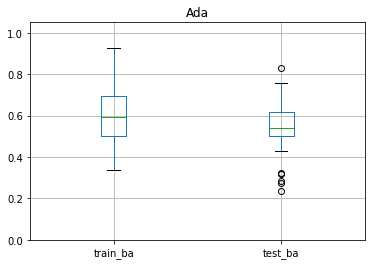

0.53 +- 0.15


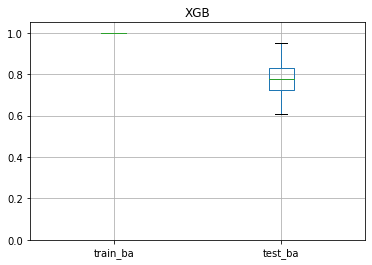

0.78 +- 0.08


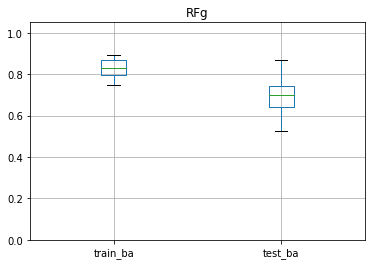

0.7 +- 0.09


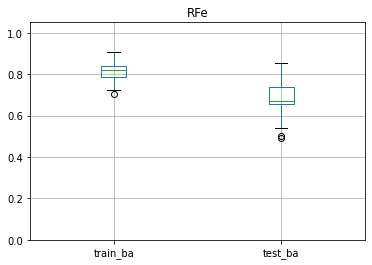

0.69 +- 0.1


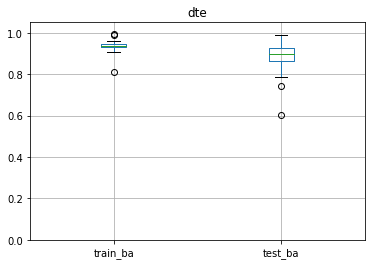

0.88 +- 0.08


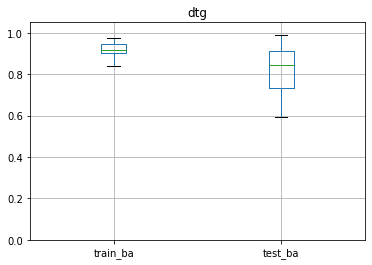

0.82 +- 0.12


In [ ]:
#plots all 6 model types as box and whisker plots
for modelType in modelTypelist: 
    tempDF = resultsDF[resultsDF.model == modelType]
    tempDF.boxplot(['train_ba','test_ba'])
    plt.title(modelType)
    plt.ylim(0, 1.05)
    plt.show()
    plt.close()
    print(str(round(np.mean(tempDF["test_ba"]),2)) + " +- " + str(round(np.std(tempDF["test_ba"]),2)))

All of these models are strong in their prediction making ability of postseason outcome. There were some with a large standard deviation, so they may not be as reliable as others. 